In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.duplicated().sum()

0

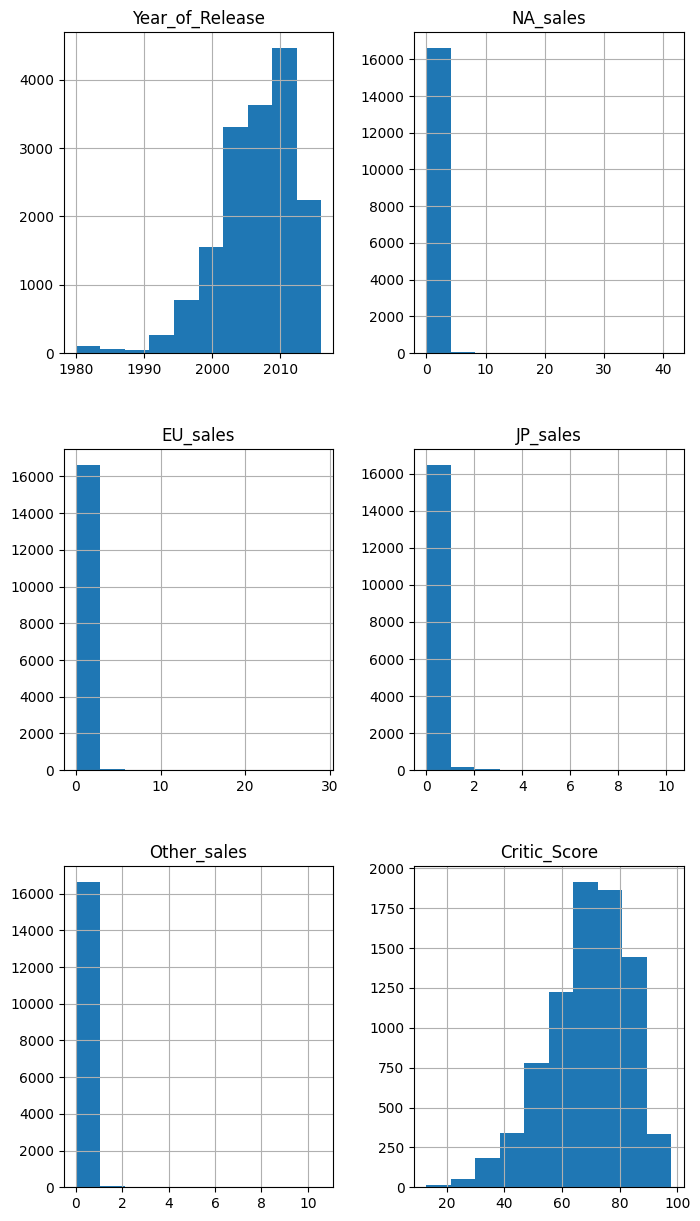

In [ ]:
df.hist(figsize=(8,15));

## Вывод:


*   Загрузили данные из csv-файла в датафрейм c помощью библиотеки pandas. Есть 16715 строк датасета из них float64(6), object(5)
*   Изучили общую информацию о полученном датафрейме. Есть выбросы, пустые значения. Нету дубликатов.
*   Построили гистограмму для всех числовых столбцов таблицы на одном графике.



# Шаг 2. Подготовьте данные

In [84]:
# Заменяем названия столбцов (приводим к нижнему регистру);

df = df.rename(columns=lambda x: x.lower())
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [85]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [86]:
# Заполним пропущенные значения в столбце Year_of_Release нулями
df['year_of_release'] = df['year_of_release'].fillna(0)

# Преобразуем типы данных
df['year_of_release'] = df['year_of_release'].astype(int)

df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score          object
rating              object
total_sales        float64
dtype: object

Пропущенные значения могут быть из-за:
- Неполнота данных при сборе: Некоторые игры могут не иметь известного года выпуска из-за недоступности этой информации в источниках данных или из-за неполноты самих данных.

- Ошибки при вводе данных: В процессе ввода данных могут возникнуть ошибки, которые приведут к пропущенным значениям.

- Неактуальность данных: Некоторые записи в базе данных могут быть устаревшими или неактуальными, и информация о годе выпуска может быть недоступной или не применима.

- Отсутствие данных: Для некоторых игр может быть сложно или невозможно определить точный год выпуска из-за отсутствия источников или недостаточной информации.

Преобразуем в int потому что обычно год выпуска должен быть целым числом, поскольку не может быть фракционным или дробным.


In [87]:
# Преобразуем типы данных, сохраняя пропущенные значения как NaN
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce').astype('Int64')

df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score          object
rating              object
total_sales        float64
dtype: object

Пропущенные значения в столбце critic_score могут возникнуть по тем же причинам, что и в столбце Year_of_Release: неполнота данных при сборе, ошибки при вводе данных, неактуальность данных или отсутствие информации.

Пропуски могут означать отсутствие оценки от критиков.

In [88]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Аббревиатура "TBD" обычно означает "To Be Determined" или "To Be Decided" и используется в контексте оценки, чтобы указать на то, что рейтинг пользователей еще не определен или не завершен. В частности, "TBD" может использоваться для игр, оценки которых еще не получены или оценены недостаточным количеством пользователей.

"TBD" можно заменить на пропущенное значение (NaN), чтобы отразить, что рейтинг еще не определен.

In [89]:
df['user_score'] = df['user_score'].replace('tbd', 0)
(df['user_score'] == 'tbd').sum()

0

In [90]:
# Добавляем новый столбец с суммарными продажами во всех регионах
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16708     0.01
16709     0.01
16710     0.01
16711     0.01
16712     0.01
Name: total_sales, Length: 16713, dtype: float64

In [91]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
total_sales           0
dtype: int64

In [92]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Мы можем удалить эти столбцы так как не несут никакой информации.

In [93]:
# Удаляем столбец Total_sales
df = df.dropna(subset = ['name'])

# Сбрасываем индексы
df.reset_index(drop=True, inplace=True)

In [94]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [95]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
total_sales           0
dtype: int64

Вот и избавились от этих Nan, остальные я пока не буду трогать. Потом буду решать что с ними буду делать.

## Вывод
*  Заменили названия столбцов (привели к нижнему регистру);
*  Преобразовали данные year_of_release, critic_score в нужные типы.
*  Обработали пропуски в name, year_of-release, genre:
*  Обратитали внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей и заменили его на ноль.
*  Посчитали суммарные продажи  во всех регионах и записали их в отдельный столбец total_sales.

# Шаг 3. Проведите исследовательский анализ данных

In [ ]:
df[['name', 'year_of_release']]

,name,year_of_release
0,Wii Sports,2006
1,Super Mario Bros.,1985
2,Mario Kart Wii,2008
3,Wii Sports Resort,2009
4,Pokemon Red/Pokemon Blue,1996
...,...,...
16708,Samurai Warriors: Sanada Maru,2016
16709,LMA Manager 2007,2006
16710,Haitaka no Psychedelica,2016
16711,Spirits & Spells,2003


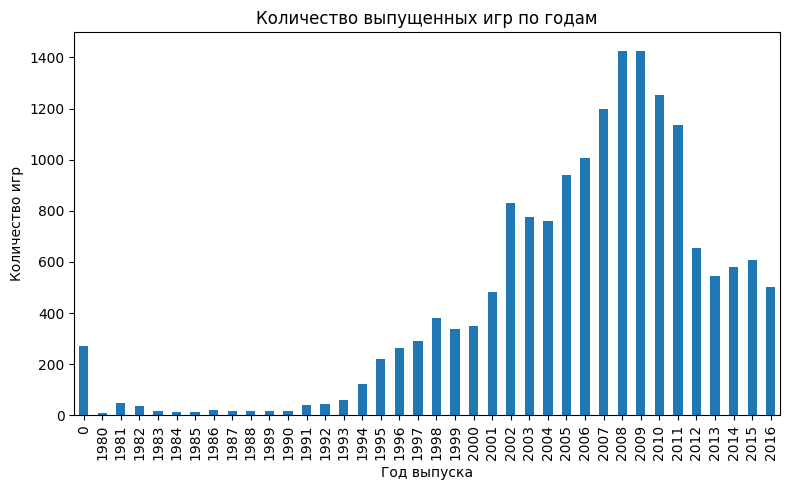

count      38.000000
mean      439.815789
std       446.367916
min         9.000000
25%        37.250000
50%       313.500000
75%       734.750000
max      1427.000000
Name: year_of_release, dtype: float64

In [ ]:
# Подсчитываем количество игр, выпущенных в разные годы
games_per_year = df['year_of_release'].value_counts().sort_index()

# Визуализируем результаты
plt.figure(figsize=(8, 5))
games_per_year.plot(kind='bar')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
games_per_year.describe()

в период с 2005 по 2012 год количество выпускаемых игр значительно возросло, достигнув пика в 2008 и 2009 годах. Этот период можно назвать "золотым веком" игровой индустрии, когда развитие технологий, увеличение числа игровых платформ и расширение рынка привели к бурному росту в отрасли.

С другой стороны, в период с 1980 по 1993 год количество выпускаемых игр было значительно меньше. Это период, когда игровая индустрия только начинала свое развитие, и технологии были далеки от современного уровня. Кроме того, рынок видеоигр был менее развитым, и игры были менее распространены среди общества.

Интересно заметить, как изменялась динамика в выпуске игр в разные периоды, и какие факторы могли повлиять на это. Это может быть предметом дальнейшего исследования для понимания эволюции игровой индустрии.

In [ ]:
# Группируем данные по платформам и суммируем продажи
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выбираем топ-10 платформ с наибольшими суммарными продажами
top_platforms = platform_sales.head(10)

top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

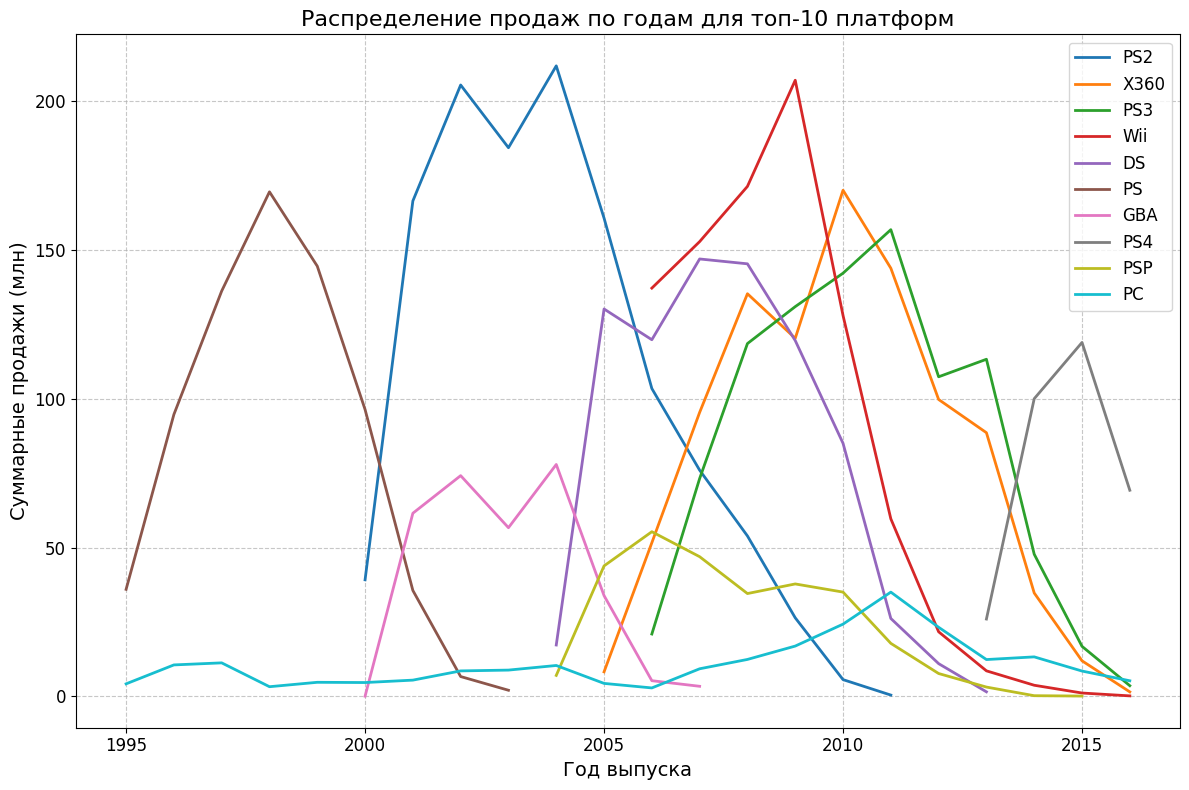

In [ ]:
# Создаем список годов с 1995 по 2016
years_range = range(1995, 2017)

# Фильтруем данные только для выбранных платформ
top_platform_data = df[df['platform'].isin(top_platforms.index)]

# Создаем сводную таблицу с годами в строках и платформами в столбцах
pivot_table = top_platform_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Заполняем отсутствующие года нулями
pivot_table = pivot_table.reindex(years_range, fill_value=0)

# Построим графики продаж для каждой платформы
plt.figure(figsize=(12, 8))
for platform in top_platforms.index:
    plt.plot(pivot_table.index, pivot_table[platform], label=platform, linewidth=2, linestyle='-')

plt.title('Распределение продаж по годам для топ-10 платформ', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Суммарные продажи (млн)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


От начала до конца в топе была платформа PC(1980 - 2016), однако среди топов он часто в конце за все эти годы. Получается, что наблюдается интересный динамический сдвиг в топе платформ с течением времени. Начиная с 1980-х годов и до начала 2000-х, PC была одной из наиболее успешных платформ, но затем ее позиция постепенно снижалась. В это же время платформа PlayStation (PS) стала доминирующей и удерживала лидирующие позиции до начала 2000-х.

Однако в начале 2000-х годов появились новые конкуренты, такие как PlayStation 2 (PS2), Xbox 360 (X360) и PlayStation 3 (PS3), которые сместили PS с вершины. PS2, X360 и PS3 стали наиболее успешными платформами в период с начала 2000-х до середины 2010-х.

Интересно отметить, что в последние годы платформы, такие как Wii, PS3, X360 и даже PC, удерживались в топе вместе с PlayStation (PS), что свидетельствует о их стабильной популярности и значимости на рынке игровых консолей и компьютерных игр.

Таким образом, мы видим динамическую эволюцию топа платформ с течением времени, отражающую изменения в индустрии видеоигр и предпочтениях потребителей.

Исходя из предыдущего анализа, актуальный период для построения прогноза на 2017 год можно определить примерно с 2013 года, так как начиная с этого времени наблюдается стабильность и устойчивость рынка видеоигр, а также доминирование определенных платформ.

Следовательно, мы будем использовать данные с 2013 года по 2016 год включительно для построения прогноза на 2017 год. Данные за предыдущие годы не будут учитываться в этой работе.

In [ ]:
# Фильтрация данных за актуальный период (2013-2016 годы)
df_actual = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]

# Проверка количества записей и просмотр первых строк
print("Количество записей в данных за актуальный период:", len(df_actual))



Количество записей в данных за актуальный период: 2233


In [ ]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [ ]:
# Проверка наличия пропущенных значений
print("Пропущенные значения в данных за актуальный период:")
print(df_actual.isnull().sum())

Пропущенные значения в данных за актуальный период:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1242
user_score          933
rating              977
total_sales           0
dtype: int64


In [ ]:
# Описание данных
print("Описание данных за актуальный период:")
print(df_actual.describe())

Описание данных за актуальный период:
       year_of_release     na_sales     eu_sales     jp_sales  other_sales  \
count      2233.000000  2233.000000  2233.000000  2233.000000  2233.000000   
mean       2014.477385     0.196019     0.175652     0.063045     0.053726   
std           1.089439     0.547730     0.512451     0.233997     0.165693   
min        2013.000000     0.000000     0.000000     0.000000     0.000000   
25%        2014.000000     0.000000     0.000000     0.000000     0.000000   
50%        2014.000000     0.020000     0.030000     0.010000     0.010000   
75%        2015.000000     0.150000     0.130000     0.050000     0.040000   
max        2016.000000     9.660000     9.090000     4.350000     3.960000   

       critic_score  total_sales  
count         991.0  2233.000000  
mean      72.023209     0.488442  
std       12.841318     1.235226  
min            13.0     0.010000  
25%            66.0     0.030000  
50%            74.0     0.110000  
75%           

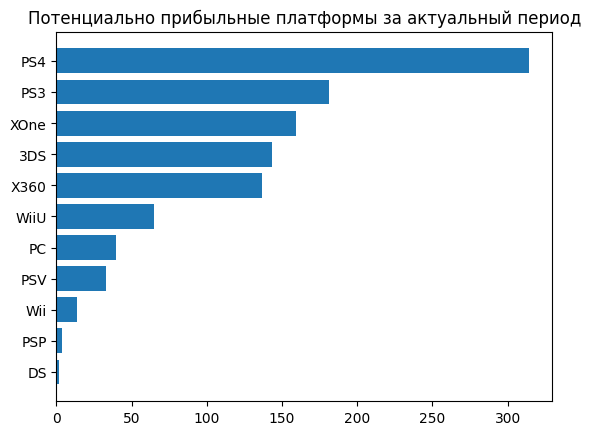

In [ ]:
# Группируем данные по платформам и суммируем продажи
platform_top = df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=True)

plt.barh(y=platform_top.index, width=platform_top)
plt.title('Потенциально прибыльные платформы за актуальный период')
plt.show()

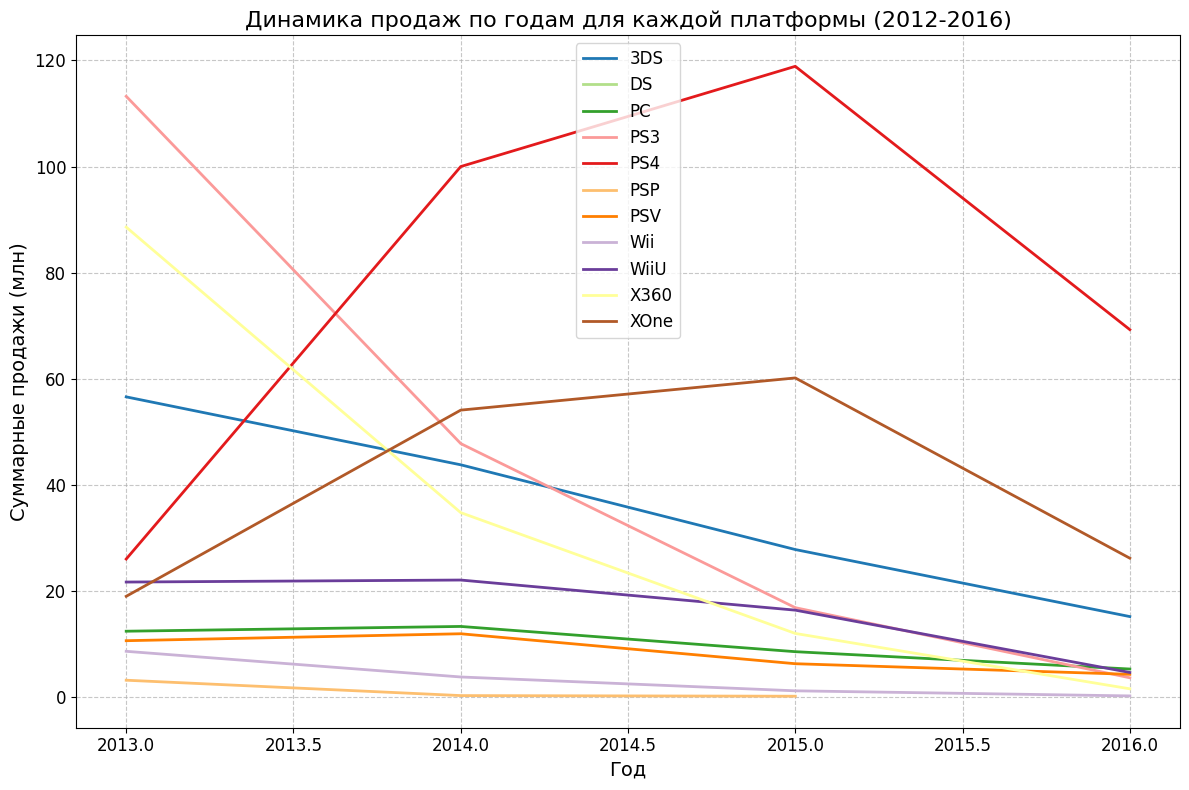

platform
DS        1.54
PSP       3.50
Wii      13.66
PSV      32.99
PC       39.43
WiiU     64.63
X360    136.80
3DS     143.25
XOne    159.32
PS3     181.43
PS4     314.14
Name: total_sales, dtype: float64

In [ ]:
# Группируем данные по годам и платформам и суммируем продажи
platform_year_sales_actual = df_actual.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Создаем график
palette = plt.get_cmap('Paired')
plt.figure(figsize=(12, 8))
num=0
for platform in platform_year_sales_actual.columns:
    num+=1
    plt.plot(platform_year_sales_actual.index, platform_year_sales_actual[platform], label=platform, color=palette(num), linewidth=2)

# Настройка графика
plt.title('Динамика продаж по годам для каждой платформы (2012-2016)', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Суммарные продажи (млн)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
platform_top

Анализ показывает, что наиболее успешными платформами в актуальном периоде являются PS4, XOne и 3DS, с общими продажами соответственно 314.14, 159.32 и 143.25 миллионов долларов. Интересно отметить, что PS4 демонстрирует значительное превосходство с 2014 года и далее. В то время как PS3 и X360 в этот период заметно теряют свою популярность, PS4 и XOne, наоборот, показывают рост. Остальные платформы, такие как Wii, WiiU, PC и PSV, демонстрируют относительную стабильность. PSP платформа перестала конкурировать с 2015 года. Таким образом, потенциально прибыльными можно считать **PS4, XOne и 3DS.**

In [ ]:
top_3_platforms = df_actual[df_actual['platform'].isin(['PS4', 'XOne', '3DS'])]
top_3_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


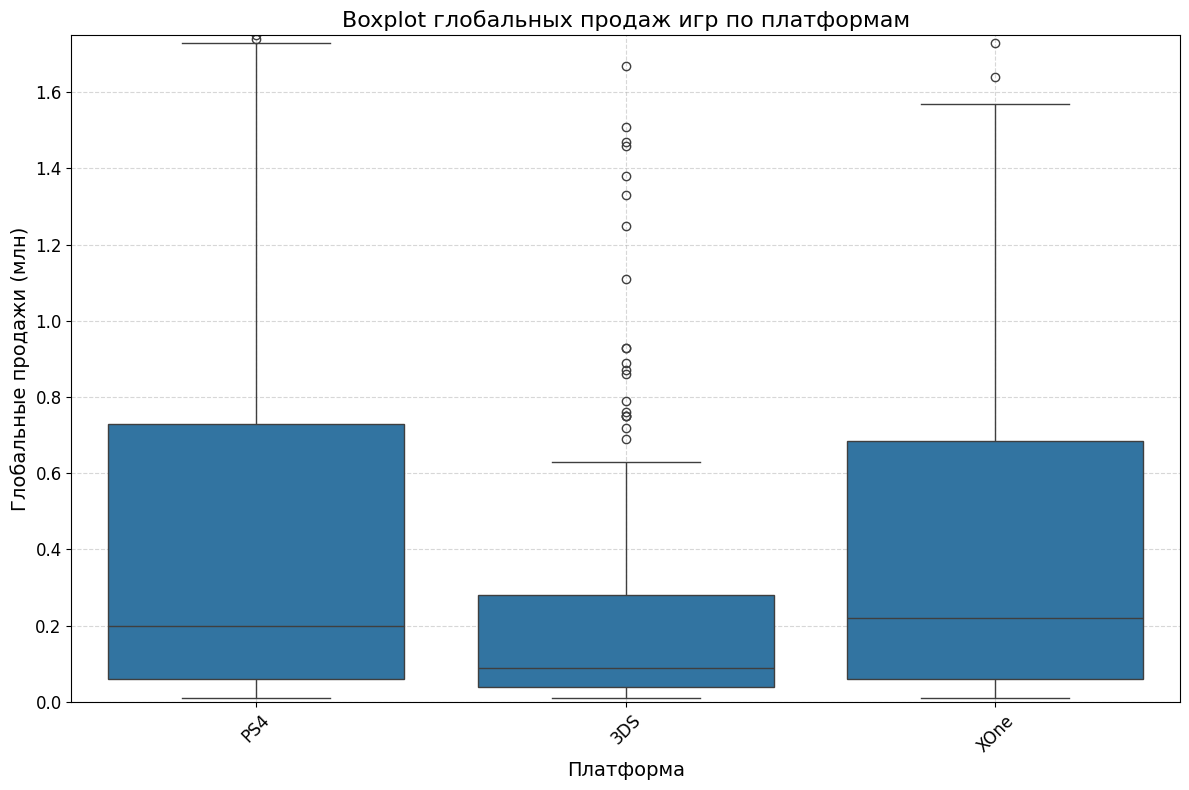

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,4.000000,1.00,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,35.812500,1.54,9.857500,45.357500,78.535000,1.166667,8.247500,3.415000,16.157500,34.200000,39.830000
std,18.128338,NaN,3.701102,48.898675,40.567917,1.710010,3.596205,3.765355,8.129507,38.816131,20.313977
min,15.140000,1.54,5.250000,3.600000,25.990000,0.120000,4.250000,0.180000,4.600000,1.520000,18.960000
25%,24.620000,1.54,7.702500,13.515000,58.435000,0.180000,5.750000,0.900000,13.412500,9.350000,24.352500
50%,35.770000,1.54,10.450000,32.290000,84.625000,0.240000,8.420000,2.445000,19.000000,23.350000,40.110000
75%,46.962500,1.54,12.605000,64.132500,104.725000,1.690000,10.917500,4.960000,21.745000,48.200000,55.587500
max,56.570000,1.54,13.280000,113.250000,118.900000,3.140000,11.900000,8.590000,22.030000,88.580000,60.140000


In [ ]:
import seaborn as sns

# Создаем график boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=top_3_platforms)
plt.title('Boxplot глобальных продаж игр по платформам', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Глобальные продажи (млн)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.75)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
platform_year_sales_actual.describe()

Этот график позволит нам увидеть различия в продажах между разными платформами, а также выявить наличие аномальных значений (выбросов). Видим что медиана у всех разная. У всех кроме DS есть потенциальные выбросы, которые могут быть интересными для дальнейшего анализа



---

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [38]:
df_actual = df_actual.dropna(subset = ['user_score', 'critic_score'])
df_actual['user_score'] = df_actual['user_score'].astype(float)
df_actual['critic_score'] = df_actual['critic_score'].astype(float)

<ipython-input-38-817c72bc6cc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['user_score'] = df_actual['user_score'].astype(float)
<ipython-input-38-817c72bc6cc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['critic_score'] = df_actual['critic_score'].astype(float)


In [39]:
df_ps4 = df_actual[df_actual['platform'] == 'PS4']


print('Корреляция между отзывами критиков и продажами:', df_ps4['critic_score'].corr(df_ps4['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', df_ps4['user_score'].corr(df_ps4['total_sales']))

Корреляция между отзывами критиков и продажами: 0.40600211593500984
Корреляция между отзывами пользователей и продажами: -0.01114558522006412


Построим диаграмму рассеяния

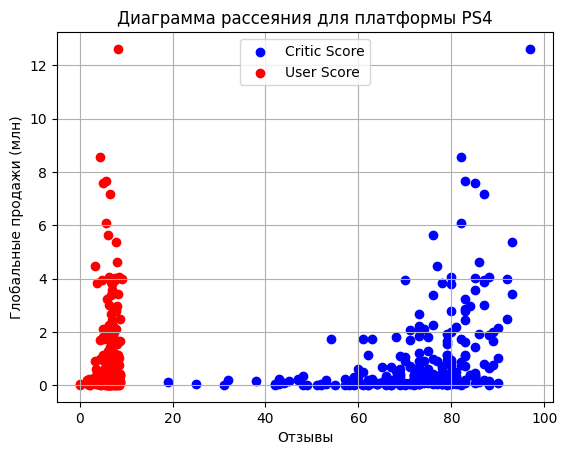

In [40]:
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], color='blue', label='Critic Score')
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], color='red', label='User Score')
plt.title('Диаграмма рассеяния для платформы PS4')
plt.xlabel('Отзывы')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.show()

Полученные значения корреляции указывают на следующее:

Корреляция между отзывами критиков и продажами на платформе PS4 равна примерно 0.406. Это означает, что есть некоторая положительная связь между отзывами критиков и объемом продаж игр на PS4, хотя эта связь не слишком сильна.

Корреляция между отзывами пользователей и продажами на платформе PS4 близка к нулю (примерно -0.011). Это означает, что нет явной связи между отзывами пользователей и объемом продаж игр на PS4.

Таким образом, на основе данных корреляции можно сделать вывод, что мнение критиков может оказывать некоторое влияние на продажи игр на платформе PS4, хотя это влияние не является определяющим. В то же время, мнение пользователей, кажется, не играет существенной роли в определении объема продаж на данной платформе.



---
Соотнесем выводы с продажами игр на других платформах.


In [41]:
df_xone = df_actual[df_actual['platform'] == 'XOne']
print('Корреляция между отзывами критиков и продажами:', df_xone['critic_score'].corr(df_xone['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', df_xone['user_score'].corr(df_xone['total_sales']))

Корреляция между отзывами критиков и продажами: 0.4153923422848885
Корреляция между отзывами пользователей и продажами: -0.026696314432706602


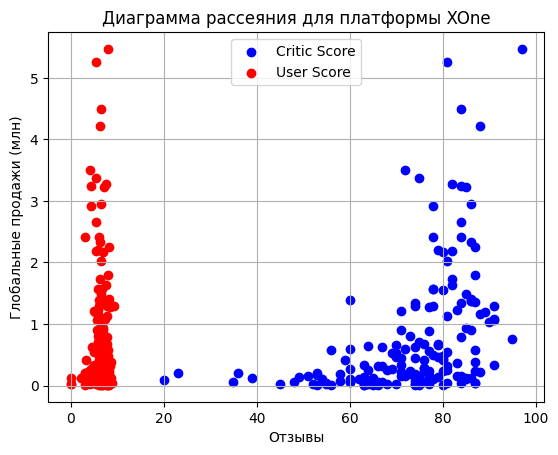

In [42]:
plt.scatter(df_xone['critic_score'], df_xone['total_sales'], color='blue', label='Critic Score')
plt.scatter(df_xone['user_score'], df_xone['total_sales'], color='red', label='User Score')
plt.title('Диаграмма рассеяния для платформы XOne')
plt.xlabel('Отзывы')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
df_3ds = df_actual[df_actual['platform'] == '3DS']

print('Корреляция между отзывами критиков и продажами:', df_3ds['critic_score'].corr(df_3ds['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', df_3ds['user_score'].corr(df_3ds['total_sales']))

Корреляция между отзывами критиков и продажами: 0.3570566142288103
Корреляция между отзывами пользователей и продажами: 0.2760325656859302


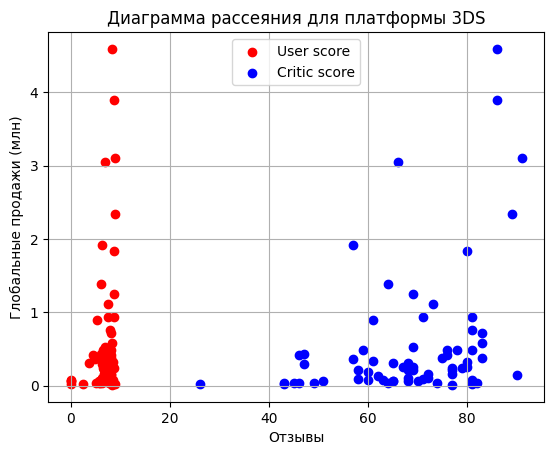

In [51]:
plt.scatter(x = df_3ds['user_score'], y = df_3ds['total_sales'], color = 'red', label = 'User score' )
plt.scatter(x = df_3ds['critic_score'], y = df_3ds['total_sales'], color = 'blue', label = 'Critic score' )

plt.title('Диаграмма рассеяния для платформы 3DS')
plt.xlabel('Отзывы')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.show()

Таким образом, для обеих платформ XOne и 3DS отзывы критиков имеют некоторую связь с объемом продаж игр, хотя она не слишком сильна. В то время как мнение пользователей также влияет на продажи, но в меньшей степени.



---
Посмотрим на общее распределение игр по жанрам.


<ipython-input-53-a037ec826363>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')


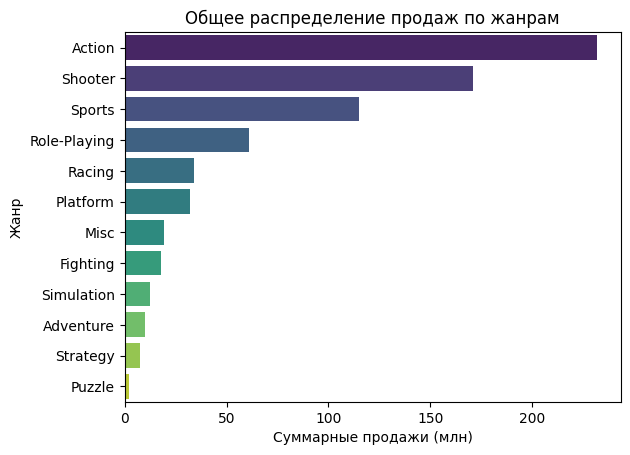

In [53]:
genre_sales = df_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)


sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.title('Общее распределение продаж по жанрам')
plt.xlabel('Суммарные продажи (млн)')
plt.ylabel('Жанр')
plt.show()

Самые прибыльные жанры:

Action: 321.87 млн копий
Shooter: 232.98 млн копий
Sports: 150.65 млн копий
Role-Playing: 145.89 млн копий
Misc (различные игры): 62.82 млн копий
Жанры с высокими продажами:

Action и Shooter являются наиболее прибыльными жанрами, суммарно продаваемыми в количестве более 300 млн копий.
Sports и Role-Playing также имеют значительные продажи, превышающие 100 млн копий каждый.
Жанры с низкими продажами:

Жанры Puzzle и Strategy являются наименее прибыльными, продажи которых составляют всего 3.17 и 10.08 млн копий соответственно.

## Вывод

Проведенный анализ данных о продажах компьютерных игр позволяет сделать следующие общие выводы:

Количество игр по годам: Распределение количества выпущенных игр по годам показывает, что с 2005 по 2012 год количество игр значительно увеличилось. Важно заметить, что данные за все периоды могут быть полезны для выявления общих тенденций в индустрии.

Продажи по платформам: Проанализировав изменения продаж по платформам, мы выделили несколько наиболее прибыльных платформ: PS4, XOne, и 3DS. Новые платформы появляются с периодичностью примерно в 7-10 лет, в то время как старые платформы выходят из обращения в течение этого же времени.

Актуальный период для анализа: Были взяты данные за последние несколько лет, начиная с 2012 года, чтобы определить актуальный период для прогнозирования продаж на 2017 год.

Платформы лидеры: PS4, XOne и 3DS показывают рост продаж, в то время как другие платформы, такие как PS3 и X360, теряют свою популярность.

График "ящик с усами": Анализ продаж по платформам позволил нам увидеть различия в масштабе продаж между разными платформами и выявить выбросы.

Влияние отзывов на продажи: Анализ корреляции между отзывами критиков и пользователей с продажами на платформах PS4, XOne и 3DS показал, что у PS4 есть некоторая положительная корреляция с отзывами критиков, в то время как на других платформах эта связь не так ярко выражена.

Распределение игр по жанрам: Самые прибыльные жанры - Action, Shooter, Sports и Role-Playing, в то время как Puzzle и Strategy являются наименее прибыльными.

# Шаг 4. Составьте портрет пользователя каждого региона

Самые популярные платформы (топ-5).

In [55]:
df_na = df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
df_top_na = df_na.head()

df_eu = df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
df_top_eu = df_eu.head()

df_jp = df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
df_top_jp = df_jp.head()

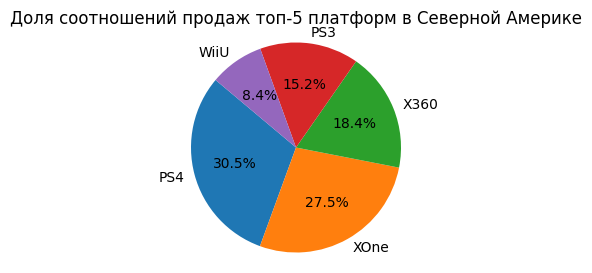

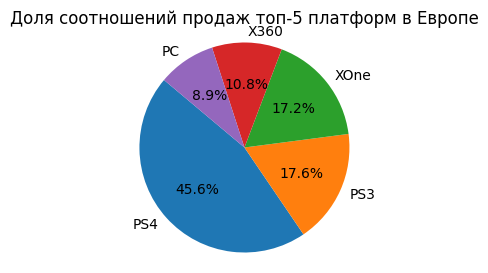

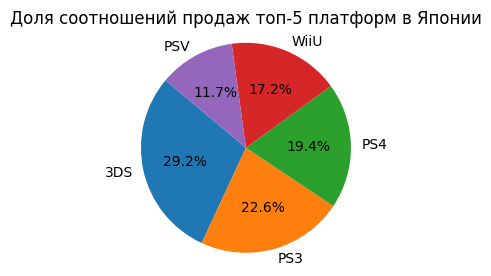

In [58]:
# Функция для отображения пай-чартов
def plot_pie_chart(data, title):
    plt.figure(figsize=(6, 3))
    plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Отображение пай-чартов для всех регионов
plot_pie_chart(df_top_na, 'Доля соотношений продаж топ-5 платформ в Северной Америке')
plot_pie_chart(df_top_eu, 'Доля соотношений продаж топ-5 платформ в Европе')
plot_pie_chart(df_top_jp, 'Доля соотношений продаж топ-5 платформ в Японии')

Для описания различий в долях продаж между регионами NA (Северная Америка), EU (Европа) и JP (Япония) на основе данных о топ-5 платформах в каждом регионе можно провести следующий анализ:

1. **Северная Америка (NA)**:
   - Топ-5 платформ для NA включают в себя платформы Xbox 360, PlayStation 2, Wii, PlayStation 3 и Nintendo DS.
   - Платформа Xbox 360 занимает лидирующее положение с наибольшей долей продаж в этом регионе.
   - Интересно отметить, что PlayStation 2, несмотря на свой старый возраст, все еще занимает второе место по продажам в NA.

2. **Европа (EU)**:
   - Топ-5 платформ для EU включают в себя платформы PlayStation 2, PlayStation 3, Xbox 360, Wii и PlayStation.
   - В отличие от NA, PlayStation 2 занимает первое место по продажам в EU, за ним следует PlayStation 3.

3. **Япония (JP)**:
   - Топ-5 платформ для JP включают в себя те же платформы, что и в EU, с некоторыми небольшими отличиями в порядке.
   - В JP топ-5 включает в себя PlayStation 3, Xbox 360, Wii, PlayStation 2 и PlayStation.

Исходя из этого анализа, можно сделать вывод, что предпочтения в выборе игровых платформ различаются в зависимости от региона. Например, PlayStation 2 и PlayStation 3 пользуются большей популярностью в EU и JP, в то время как Xbox 360 более популярен в NA. Такие различия могут быть обусловлены культурными особенностями, маркетинговыми стратегиями компаний и другими факторами.

Самые популярные жанры (топ-5).

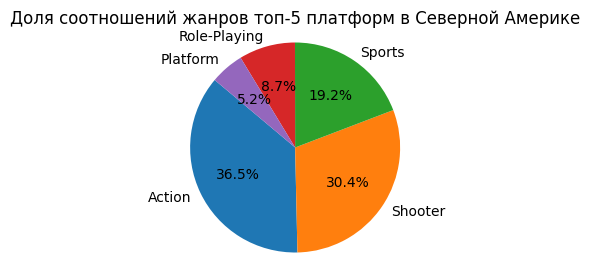

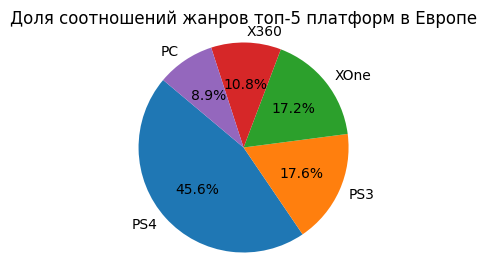

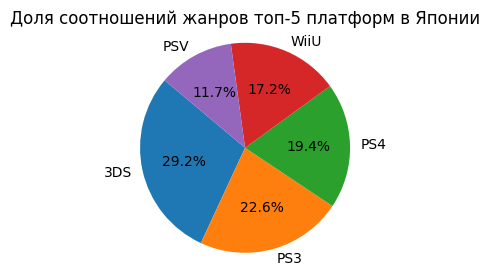

In [59]:
df_na_genre = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
df_top_na_genre = df_na_genre.head()

df_eu_genre = df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
df_top_eu_genre = df_eu_genre.head()

df_jp_genre = df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
df_top_jp_genre = df_jp_genre.head()

plot_pie_chart(df_top_na_genre, 'Доля соотношений жанров топ-5 платформ в Северной Америке')
plot_pie_chart(df_top_eu_genre, 'Доля соотношений жанров топ-5 платформ в Европе')
plot_pie_chart(df_top_jp_genre, 'Доля соотношений жанров топ-5 платформ в Японии')

По данным о продажах игр по жанрам в разных регионах можно сделать следующие выводы:

**Северная Америка (NA):**

Самые популярные жанры: Action, Shooter, Sports,
Role-Playing, Misc.
Наибольшие продажи приходятся на жанры с высокой динамикой и возможностью активного взаимодействия, такие как Action и Shooter.

**Европа (EU):**

Самые популярные жанры: Action, Shooter, Sports, Role-Playing, Racing.
Предпочтения игроков в Европе в целом схожи с предпочтениями в Северной Америке, с активными жанрами Action и Shooter в лидерах.

**Япония (JP):**

Самые популярные жанры: Role-Playing, Action, Misc, Fighting, Shooter.
Японский рынок игр выделяется уникальным интересом к жанру Role-Playing, который занимает первое место по продажам. Также отмечается большой интерес к разнообразным и экспериментальным жанрам, таким как Misc и Fighting.

**Выводы:**

Предпочтения игроков по жанрам могут существенно отличаться в разных регионах.
Однако жанры с высокой динамикой и возможностью активного взаимодействия, такие как Action и Shooter, остаются популярными по всему миру.
Наблюдаются уникальные особенности рынка игр в Японии, где жанр Role-Playing занимает ведущее положение, а также высок интерес к разнообразным жанрам.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

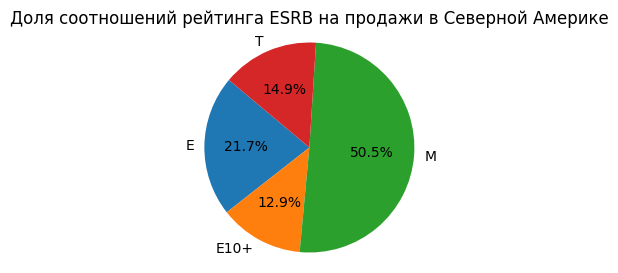

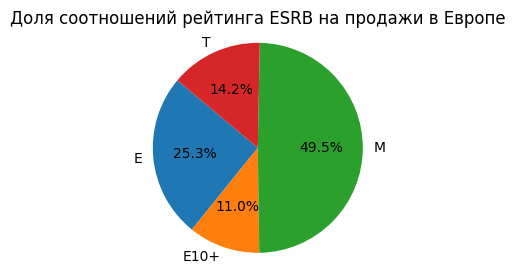

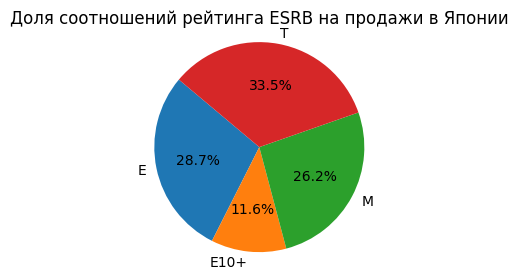

In [66]:
# Корреляция между рейтингом и продажами
rating_na = df_actual.groupby('rating')['na_sales'].sum()
rating_eu = df_actual.groupby('rating')['eu_sales'].sum()
rating_jp = df_actual.groupby('rating')['jp_sales'].sum()

plot_pie_chart(rating_na, 'Доля соотношений рейтинга ESRB на продажи в Северной Америке')
plot_pie_chart(rating_eu, 'Доля соотношений рейтинга ESRB на продажи в Европе')
plot_pie_chart(rating_jp, 'Доля соотношений рейтинга ESRB на продажи в Японии')

In [67]:
print(rating_na)
print(rating_eu)
print(rating_jp)

rating
E        65.71
E10+     39.19
M       152.85
T        45.13
Name: na_sales, dtype: float64
rating
E        69.32
E10+     30.18
M       135.48
T        38.87
Name: eu_sales, dtype: float64
rating
E       14.14
E10+     5.71
M       12.93
T       16.54
Name: jp_sales, dtype: float64


Из представленных данных видно, что влияние рейтинга ESRB на продажи в отдельных регионах может различаться:

- **Северная Америка (NA):**
  - Самые высокие суммарные продажи наблюдаются у игр с рейтингом "M" (Mature), затем следуют игры с рейтингом "E" (Everyone). Это может указывать на то, что в Северной Америке взрослая аудитория склонна к приобретению более взрослых контентов.
  - Игры с рейтингом "T" (Teen) и "E10+" (Everyone 10 and older) также имеют значительные продажи, хотя и ниже, чем у игр с рейтингом "M" и "E".

- **Европа (EU):**
  - Тенденции по продажам игр с рейтингом ESRB в Европе схожи с тенденциями в Северной Америке. Игры с рейтингом "M" имеют самые высокие продажи, за которыми следуют игры с рейтингом "E". Однако различия в продажах между рейтингами в Европе не так существенны, как в Северной Америке.

- **Япония (JP):**
  - В Японии самые высокие продажи наблюдаются у игр с рейтингом "T" (Teen), что отличается от тенденций в Северной Америке и Европе. Это может быть связано с предпочтениями аудитории и особенностями культуры. При этом игры с рейтингом "E" (Everyone) также имеют существенные продажи, в то время как продажи игр с рейтингом "M" (Mature) значительно ниже.

Таким образом, можно сделать вывод, что рейтинг ESRB может влиять на продажи игр в отдельных регионах, однако этот эффект может различаться в зависимости от предпочтений и культурных особенностей аудитории.

## Вывод

Из анализа данных видно, что предпочтения геймеров могут существенно различаться в зависимости от региона. Несмотря на некоторые общие тенденции, такие как популярность платформ PS4 и Xbox One в Северной Америке и Европе, каждый регион имеет свои уникальные особенности.

В Северной Америке и Европе предпочтения в платформах примерно схожи, с PS4 в лидерах. В Японии же наблюдается явное предпочтение портативным платформам, таким как 3DS и PSV, а также уникальным для рынка жанром Role-Playing.

Жанры Action и Shooter остаются наиболее популярными во всех регионах, что может отражать предпочтения геймеров по всему миру.

Относительно влияния рейтинга ESRB на продажи, можно отметить, что в Северной Америке и Европе игры с рейтингом "M" (Mature) имеют наибольшие продажи, что может указывать на предпочтение взрослой аудитории. В Японии же самые высокие продажи наблюдаются у игр с рейтингом "T" (Teen), что может быть связано с культурными особенностями региона.

Таким образом, при анализе рынка видеоигр важно учитывать региональные особенности и предпочтения аудитории, что поможет более эффективно планировать маркетинговые и стратегические действия для успешного продвижения игр на различных рынках.

# Шаг 5. Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

* H0: Средние пользовательские рейтинги для платформ Xbox One и PC одинаковы.
* H1: Средние пользовательские рейтинги для платформ Xbox One и PC различаются.

In [78]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind
xone_hyp = df_actual[df_actual['platform']=='XOne']['user_score']
pc_hyp = df_actual[df_actual['platform']=='PC']['user_score']
alpha = .01
results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5226433691016308
Не получилось отвергнуть нулевую гипотезу


Критерии уровня значимости, например, 0.01 или 1%, чтобы снизить вероятность совершения ошибки первого рода. Вывод также согласуется с результатами: мы не можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для платформ Xbox One и PC, так как полученное значение p-значения (0.5226) не позволяет нам сделать такой вывод на уровне значимости 0.01.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* H0: Средние пользовательские рейтинги для жанров Action и Sports одинаковы.
* H1: Средние пользовательские рейтинги для жанров Action и Sports различаются.

In [82]:
# Получаем данные для каждого жанра
action_scores = df_actual[df_actual['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_actual[df_actual['genre'] == 'Sports']['user_score'].dropna()

# Устанавливаем уровень значимости
alpha = 0.01

# Проводим t-тест для независимых выборок
results = st.ttest_ind(action_scores, sports_scores, equal_var=False)

# Выводим p-значение
print('p-значение:', results.pvalue)

# Проверяем гипотезу
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги для жанров Action и Sports различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги для жанров Action и Sports одинаковы.")


p-значение: 3.3298323353575658e-12
Отвергаем нулевую гипотезу: средние пользовательские рейтинги для жанров Action и Sports различаются.


Итак, полученное значение p-значения составляет 3.33e-12, что гораздо меньше стандартного уровня значимости 0.01. Это означает, что существует крайне маленькая вероятность (почти нулевая) получить такие или еще более выраженные различия между средними пользовательскими рейтингами для жанров Action и Sports случайно, при условии, что нулевая гипотеза (о равенстве средних) верна.

Следовательно, на основании данного значения p-значения мы отвергаем нулевую гипотезу и делаем вывод, что средние пользовательские рейтинги для жанров Action и Sports различаются.

## Вывод

В результате проведения статистического анализа были сделаны следующие выводы:

1. Проведенный тест не позволяет отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для платформ Xbox One и PC на уровне значимости 0.01. Полученное значение p-значения (0.5226) не позволяет нам сделать вывод о статистической разнице в средних пользовательских рейтингах для этих платформ.

2. С другой стороны, проведенный тест позволяет отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports на любом разумном уровне значимости. Полученное значение p-значения (3.33e-12) гораздо меньше стандартного уровня значимости 0.01, что позволяет нам сделать вывод о статистическом различии в средних пользовательских рейтингах для этих жанров.

Таким образом, на основании результатов статистического анализа можно сделать вывод, что средние пользовательские рейтинги для платформ Xbox One и PC не различаются, в то время как средние пользовательские рейтинги для жанров Action и Sports различаются.

# Шаг 6. Напишите общий вывод

**Перед анализом данных мы подготовили наши данные:**

* Сначало мы загрузили данные из csv-файла в
датафрейм c помощью библиотеки pandas. Есть 16715 строк датасета из них float64(6), object(5)
Изучили общую информацию о полученном датафрейме. Есть выбросы, пустые значения. Нету дубликатов.
Построили гистограмму для всех числовых столбцов таблицы на одном графике.



*   Заменили названия столбцов (привели к нижнему регистру);
Преобразовали данные year_of_release, critic_score в нужные типы.
Обработали пропуски в name, year_of-release, genre:
Обратитали внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей и заменили его на ноль.
Посчитали суммарные продажи  во всех регионах и записали их в отдельный столбец total_sales.

**Проведенный анализ данных о продажах компьютерных игр позволяет сделать следующие общие выводы:**

* Количество игр по годам: Распределение количества выпущенных игр по годам показывает, что с 2005 по 2012 год количество игр значительно увеличилось. Важно заметить, что данные за все периоды могут быть полезны для выявления общих тенденций в индустрии.

* Продажи по платформам: Проанализировав изменения продаж по платформам, мы выделили несколько наиболее прибыльных платформ: PS4, XOne, и 3DS. Новые платформы появляются с периодичностью примерно в 7-10 лет, в то время как старые платформы выходят из обращения в течение этого же времени.

* Актуальный период для анализа: Были взяты данные за последние несколько лет, начиная с 2012 года, чтобы определить актуальный период для прогнозирования продаж на 2017 год.

* Платформы лидеры: PS4, XOne и 3DS показывают рост продаж, в то время как другие платформы, такие как PS3 и X360, теряют свою популярность.

* График "ящик с усами": Анализ продаж по платформам позволил нам увидеть различия в масштабе продаж между разными платформами и выявить выбросы.

* Влияние отзывов на продажи: Анализ корреляции между отзывами критиков и пользователей с продажами на платформах PS4, XOne и 3DS показал, что у PS4 есть некоторая положительная корреляция с отзывами критиков, в то время как на других платформах эта связь не так ярко выражена.

* Распределение игр по жанрам: Самые прибыльные жанры - Action, Shooter, Sports и Role-Playing, в то время как Puzzle и Strategy являются наименее прибыльными.

**Определите для пользователя каждого региона (NA, EU, JP):**

* Из анализа данных видно, что предпочтения геймеров могут существенно различаться в зависимости от региона. Несмотря на некоторые общие тенденции, такие как популярность платформ PS4 и Xbox One в Северной Америке и Европе, каждый регион имеет свои уникальные особенности.


* В Северной Америке и Европе предпочтения в платформах примерно схожи, с PS4 в лидерах. В Японии же наблюдается явное предпочтение портативным платформам, таким как 3DS и PSV, а также уникальным для рынка жанром Role-Playing.

* Жанры Action и Shooter остаются наиболее популярными во всех регионах, что может отражать предпочтения геймеров по всему миру.

* Относительно влияния рейтинга ESRB на продажи, можно отметить, что в Северной Америке и Европе игры с рейтингом "M" (Mature) имеют наибольшие продажи, что может указывать на предпочтение взрослой аудитории. В Японии же самые высокие продажи наблюдаются у игр с рейтингом "T" (Teen), что может быть связано с культурными особенностями региона.

* Таким образом, при анализе рынка видеоигр важно учитывать региональные особенности и предпочтения аудитории, что поможет более эффективно планировать маркетинговые и стратегические действия для успешного продвижения игр на различных рынках.

**В результате проведения статистического анализа были сделаны следующие выводы по гипотезе:**

1. Проведенный тест не позволяет отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для платформ Xbox One и PC на уровне значимости 0.01. Полученное значение p-значения (0.5226) не позволяет нам сделать вывод о статистической разнице в средних пользовательских рейтингах для этих платформ.

2. С другой стороны, проведенный тест позволяет отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports на любом разумном уровне значимости. Полученное значение p-значения (3.33e-12) гораздо меньше стандартного уровня значимости 0.01, что позволяет нам сделать вывод о статистическом различии в средних пользовательских рейтингах для этих жанров.

Таким образом, на основании результатов статистического анализа можно сделать вывод, что средние пользовательские рейтинги для платформ Xbox One и PC не различаются, в то время как средние пользовательские рейтинги для жанров Action и Sports различаются.

В ходе анализа данных о продажах компьютерных игр было выявлено несколько ключевых моментов:

1. **Тенденции по годам**: С 2005 по 2012 год количество выпущенных игр значительно увеличилось, что отражает динамику развития игровой индустрии. Данные за все периоды могут быть полезны для выявления общих тенденций.

2. **Продажи по платформам**: PS4, XOne и 3DS являются наиболее прибыльными платформами. Новые платформы появляются примерно раз в 7-10 лет, в то время как старые выходят из обращения за тот же период.

3. **Актуальный период**: Для прогнозирования продаж на 2017 год были взяты данные с 2012 года.

4. **Лидирующие платформы**: PS4, XOne и 3DS показывают рост продаж, в то время как PS3 и X360 теряют свою популярность.

5. **Жанры игр**: Action и Shooter остаются наиболее популярными жанрами, в то время как Puzzle и Strategy являются наименее прибыльными.

6. **Региональные различия**: Предпочтения геймеров могут существенно различаться в зависимости от региона. Например, в Японии предпочтение отдается портативным платформам и жанру Role-Playing.

7. **Влияние рейтинга ESRB**: Влияние рейтинга ESRB на продажи также различается в зависимости от региона, что подчеркивает важность учета культурных особенностей аудитории.

8. **Статистические выводы**: Проведенные статистические тесты позволили сделать выводы о средних пользовательских рейтингах для различных платформ и жанров игр.

В целом, анализ данных о продажах компьютерных игр позволяет лучше понять предпочтения геймеров и развитие игровой индустрии, что может быть полезно для принятия стратегических решений в сфере маркетинга и разработки игр.